In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers
from tensorflow.keras.models import Sequential
%matplotlib inline


In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#y_train is currently in 2D so we will reshape it 2D to 1D array
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horses', 'ship', 'truck']

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

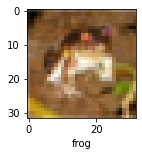

In [ ]:
plot_sample(X_train,y_train,0)

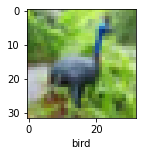

In [ ]:
plot_sample(X_train,y_train,6)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
cnn = Sequential([

  layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),

   layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
   layers.MaxPooling2D((2,2)),

   layers.Flatten(),

   layers.Dense(64, activation='relu'),
   layers.Dense(10, activation='softmax')
  ])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 1.4841 - accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1122 - accuracy: 0.6101
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9789 - accuracy: 0.6605
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8936 - accuracy: 0.6880
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8267 - accuracy: 0.7158
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7688 - accuracy: 0.7322
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7224 - accuracy: 0.7499
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6782 - accuracy: 0.7645
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6405 - accuracy: 0.7774
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.60

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9021 - accuracy: 0.7107


[0.9020673036575317, 0.7106999754905701]

In [ ]:
y_test = y_test.reshape(-1)

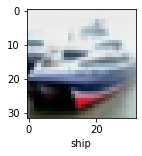

In [ ]:
plot_sample(X_test,y_test,1)

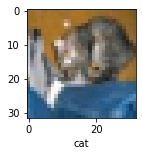

In [ ]:
plot_sample(X_test,y_test,0)


In [ ]:
y_pred = cnn.predict(X_test)

In [ ]:
y_pred[:5]

array([[1.1377764e-03, 3.2340969e-05, 9.4180452e-03, 8.1882268e-01,
        1.4674787e-03, 4.7188677e-02, 8.7324746e-02, 3.9952228e-04,
        3.3977158e-02, 2.3162003e-04],
       [7.7053178e-03, 1.6689646e-01, 1.8875735e-05, 4.1324934e-06,
        6.0270804e-07, 4.7371564e-09, 2.0236402e-07, 9.1365955e-09,
        8.2469267e-01, 6.8167521e-04],
       [4.2024031e-01, 1.7530547e-02, 6.3263755e-03, 1.0682782e-02,
        9.7125359e-03, 1.9604522e-04, 2.5729413e-04, 3.2304061e-04,
        5.3132778e-01, 3.4033102e-03],
       [9.7712874e-01, 1.2186952e-03, 9.2870643e-04, 2.4343877e-04,
        1.5349333e-04, 1.3664001e-06, 4.8709531e-05, 9.2012151e-06,
        2.0052304e-02, 2.1540780e-04],
       [2.6774824e-06, 5.9001763e-07, 3.2705572e-03, 1.3523852e-02,
        7.5061399e-01, 1.2832375e-04, 2.3244345e-01, 6.8510252e-07,
        1.5748794e-05, 1.6631058e-07]], dtype=float32)

In [ ]:
np.argmax(y_pred[1])

8

In [ ]:
y_classes = [np.argmax(e) for e in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report

print("Classification report : \n ", classification_report(y_test,y_classes))

Classification report : 
                precision    recall  f1-score   support

           0       0.67      0.82      0.74      1000
           1       0.81      0.84      0.82      1000
           2       0.63      0.57      0.60      1000
           3       0.55      0.52      0.53      1000
           4       0.64      0.68      0.66      1000
           5       0.66      0.60      0.63      1000
           6       0.76      0.80      0.78      1000
           7       0.72      0.79      0.75      1000
           8       0.86      0.79      0.82      1000
           9       0.82      0.71      0.76      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

